# Presentation Data

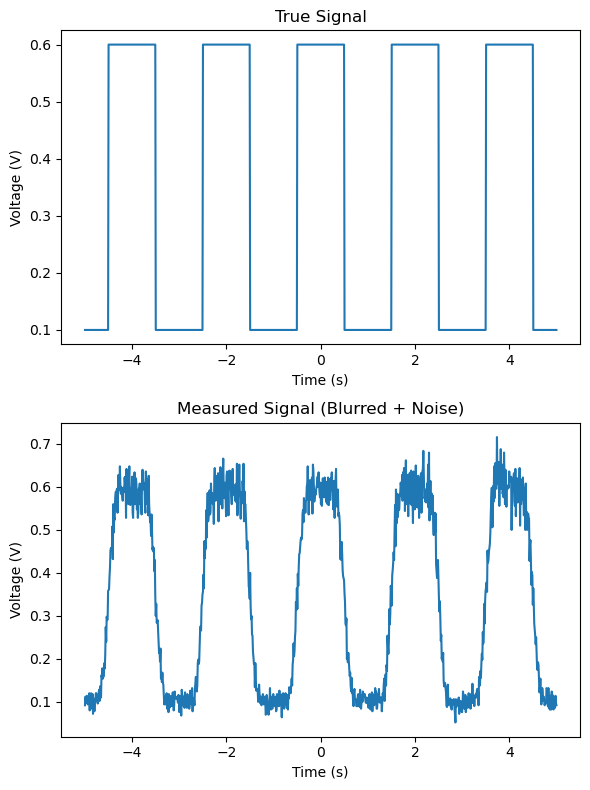

In [9]:
import torch
import matplotlib.pyplot as plt
from ImageDebluring import *
from PIL import Image
from torchvision import transforms


def step_function(period=2.0):
    xs = torch.linspace(-5, 5, steps=1000)
    ys = (((xs.round() % period) == 0).float() + 0.2)/2
    return xs, ys

# convolve step function with a Gaussian kernel

x, y = step_function()
signal = y.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
kernel = gaussian_normalised_kernel_1D(size = 61, sigma = 10.0)

blurred_signal = convolution_1D(signal, kernel, padding_mode="replicate")
measured_signal = add_poisson_noise(blurred_signal, scale_factor=500)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(6, 8))
axs[0].plot(x,y)
axs[0].set_title("True Signal")
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Voltage (V)')
axs[1].plot(x, measured_signal.squeeze().detach())
axs[1].set_title("Measured Signal (Blurred + Noise)")
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Voltage (V)')
fig.tight_layout()